In [1]:
import sys, os
# from utils import set_watermark
import pandas as pd
import polars as pl
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [2]:
def color_mapping(df:pl.DataFrame, image_pardir: str | Path):
    if not isinstance(image_pardir, Path):
        image_pardir = Path(image_pardir)

    # 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
    colors = ((180, 119, 31), (14, 127, 255), (44, 160, 44), (40, 39, 214), (189, 103, 148), (75, 86, 140), (194, 219, 227), (127, 127, 127), (34, 189, 188), (207, 190, 23), (0, 0, 0))
    
    alpha = 0.8
    beta = 1 - alpha
    
    v_img = []
    h_img = []
    try:
        image_paths_and_clusters = df.select([pl.col("filepath"), pl.col("cluster")]).to_numpy()
    except:
        image_paths_and_clusters = df.select([pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/"), pl.col("cluster")]).to_numpy()
    
    # for i, (image_path, main_cluster, sub_cluster) in enumerate(image_paths_and_clusters):
    for i, (image_path, main_cluster,) in enumerate(image_paths_and_clusters):
        # print(i)
        image = cv2.imread(str(image_pardir / image_path))

        img_filter = np.zeros(image.shape[:], dtype=np.uint8)
        # if (main_cluster == 0) or (main_cluster == 3):
        #     img_filter[:] = colors[sub_cluster]
        # else:
        #     img_filter[:] = colors[-1]
        img_filter[:] = colors[main_cluster]
        
        image = cv2.addWeighted(image, alpha, img_filter, beta, 0)

        h_img.append(image)

        if (i+1) % 40 == 0:
            v_img.append(cv2.hconcat(h_img))
            h_img.clear()
            
    
    return cv2.vconcat(v_img)
    # return cv2.cvtColor(cv2.vconcat(v_img), cv2.COLOR_BGR2RGB)

---

In [20]:
# csv_root = Path('/home/shinsei/img_crop/forest/AdamPaper/feature/clusterized/vbgm_pca3_forest_for_check_lr1e-03_lf6.4e+01_epoch1000_SPARSE_CAE_rho05_beta05_selu.csv')
lf = 64
AE_model = 'cae'
csv_root = Path('../for_presen/32x32/cae32/clustering/vbgmm_learndata/vbgmm_pca_18_10clusters_forest_for_check_lr1e-03_lf6.4e+01_epoch100_SimpleCAE32_selu_selu_selu_sigmoid_BCE.csv')
save_dir = Path('../for_presen/32x32/cae32/cluster_images/vbgmm_pca_18_10clusters')
df = pd.read_csv(csv_root)
# mask = (df_pca_lf500['height_class'].values >= 1) & (df_pca_lf500['height_class'].values <= 3)
# out_pca = rebuilt_image(df_pca_lf500[mask])
# out_pca_lf500 = rebuilt_image(df_pca_lf500)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,filename,dirname,image_class,cluster
0,-0.612980,0.187124,-0.584626,0.309186,-0.106540,0.681822,0.051253,-0.347851,0.974826,0.601373,...,0.099155,-0.367069,0.691023,-0.256093,-0.470695,0.046493,10k_1_h000_w0000.png,1,1,0
1,0.038397,0.844668,-0.740482,0.436018,0.622475,0.736823,0.945468,0.668331,-0.453165,0.662977,...,-0.527806,0.012297,0.569802,-0.044222,-0.255783,0.111338,10k_1_h000_w0032.png,1,1,7
2,-0.361530,0.179809,-0.332572,0.483755,0.033364,0.074902,0.635855,0.387883,0.094397,0.032802,...,0.472434,0.571475,-0.548001,-0.103837,-0.180514,-0.663240,10k_1_h000_w0064.png,1,1,0
3,-0.007233,-0.093037,0.760103,1.041076,0.030210,0.313301,-0.041541,0.016602,-0.179645,0.222520,...,0.297428,-0.189930,-1.024630,-0.941318,-0.349078,0.117412,10k_1_h000_w0096.png,1,1,9
4,0.340294,0.435670,0.351353,-0.085328,-0.123533,-0.661237,-0.439446,0.073267,0.224166,-0.109947,...,0.177372,0.521728,0.568305,0.941327,0.462103,0.301318,10k_1_h000_w0128.png,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,-0.269082,0.308934,0.119045,0.203453,0.046573,0.273679,-0.313384,-0.243832,0.245633,-0.205985,...,-0.047475,-0.203417,0.018449,0.698477,-0.233329,-0.057443,10k_8_h928_w1120.png,8,8,9
9596,-0.150684,-0.128096,0.690680,0.261232,0.046907,0.207988,0.265443,-0.386374,-0.188058,0.376212,...,0.544609,0.236386,0.060953,0.465975,0.013905,0.013039,10k_8_h928_w1152.png,8,8,7
9597,0.239318,-0.359336,-0.505145,0.122946,0.498286,-0.557185,-0.404012,0.403337,-0.108215,0.284111,...,-0.102166,0.279056,0.655848,-0.261121,0.250621,-0.687409,10k_8_h928_w1184.png,8,8,5
9598,-0.342952,-0.204103,0.112986,0.425516,0.056203,0.317760,-0.281598,-0.880949,0.560044,0.035212,...,-0.488144,-0.125622,0.191735,0.233833,-0.229918,-0.319071,10k_8_h928_w1216.png,8,8,9


In [22]:
save_dir

PosixPath('../for_presen/32x32/cae32/cluster_images/vbgmm_pca_18_10clusters')

In [23]:
img_classes = df['image_class'].values
if not os.path.exists(save_dir / f'colormap_{AE_model}_lf{lf}'):
    os.makedirs(save_dir / f'colormap_{AE_model}_lf{lf}')
imgs = []
for l in np.unique(img_classes):
    print(l)
    img = colormapping(df[df['image_class']==l], '../data/CNTForest/cnt_sem_for_check_32x32/10k/')
    imgs.append(img)
    # cv2.imwrite(str(save_dir/'colormap_{AE_model}_lf{lf}'/f'image_class{l}.png'), img)
    cv2.imwrite(str(save_dir/f'colormap_{AE_model}_lf{lf}'/f'image_class{l}.png'), img)

1
2
3
4
5
6
7
8


In [10]:
save_dir.exists()

True

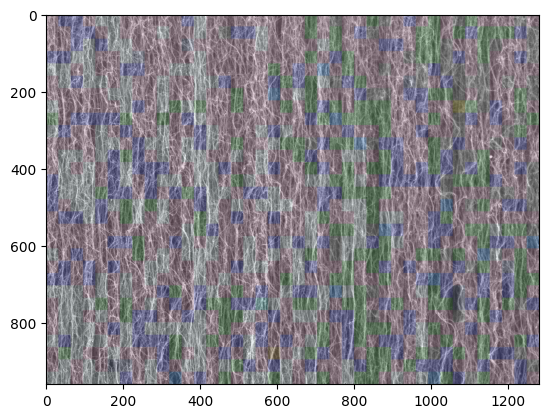

In [9]:
plt.imshow(img)